<a href="https://colab.research.google.com/github/LegendSeyi/Support-Vector-Machine-ML-project/blob/main/Group_G_SVM_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title of Project:** Spam Message Detection Using Support Vector Machine

**Algorithm:** Support Vector Machine

**Description:** Classify SMS messages as spam or non-spam.

**Tasks:**
- Preprocess text
- vectorize features
- train SVM
- evaluate performance.

**Evaluation Metrics:**
* Precision
* Recall
* F1-Score

**Required Explanation:**
*Discuss patterns associated with spam messages and the importance of precision.*

We now import the important libraries needed for this project

In [ ]:
import pandas as pd     # from dataframe
import numpy as np     # An array object of arbitrary homogeneous items and Fast mathematical operations over arrays
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer  #Converts text into numerical features that a machine learning model can understand.
from sklearn.svm import LinearSVC  #Implements a Support Vector Machine (SVM) classifier with a linear kernel.
from sklearn.svm import SVC  #Implements a Support Vector Machine classifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import re #regular expression for pattern based text cleaning

In [ ]:
# configuring the dataset
# calling the url link where the dataset is stored.
# pd.set_option to enable us to see the maximum column in the dataset

url = "https://github.com/LegendSeyi/Dataset/raw/refs/heads/main/spam.csv"
pd.set_option("display.max_columns", None)

data  = pd.read_csv(url, encoding = "latin-1")

In [ ]:
#Checking the first 10 rows of the dataset
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
data.shape

(5572, 5)

We can observe that the dataset has 5572 rows and 5 columns.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


V1 and V2 columns has no null values. but the unnamed columns 2,3,4 has nun values. The data types appears to be objects (letters/ strings)

## EDA (Exploratory Data Analysis)

From the observation, the dataset contains unnecessary columns with alot of NaN. These columns are not required for our classification. Only: v1 (message label) v2 (SMS content)are retained. These columns are renamed to label and message for clarity.

In [ ]:
# Keep only label and message columns
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

In [ ]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#checking uniques of value in column
print(f'unique values in label are {data['label'].unique()}')
data['label'].nunique()

unique values in label are ['ham' 'spam']


2

Checking the unique values of the column "label". We have just two unique values

In [ ]:
print(f'Ham: {data.loc[data['label'] == 'ham'].count()}')

print(f'Spam: {data.loc[data['label'] == 'spam'].count()}')

Ham: label      4825
message    4825
dtype: int64
Spam: label      747
message    747
dtype: int64


From the dataset, the number of Ham messages are 4825 mesasages.... the number of Spam messages are 747 mesasages....

In [ ]:
data['message_length'] = data['message'].apply(len)

data.groupby('label')['message_length'].mean()


,message_length
label,
ham,71.023627
spam,138.866131


Spam massages tend to be longer than non spam messages

## TEXT PREPROCESSING

In [ ]:
data['message'].head()

,message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import nltk #Natural Language Toolkit
from nltk.corpus import stopwords #imports a list of common words
from nltk.stem import PorterStemmer #an algorithm used to reduce words to their root form.

This imports NLTK (Natural Language Toolkit), a Python library used for Natural Language Processing tasks like text cleaning, tokenization, stemming, and stop-word removal.

Stop words are common words in a language that appear very frequently but carry little meaningful information for tasks like text classification.

Examples in English:

a, an, the, is, in, on, and, of, to, for

#### Using Stemming for preocessing of Text

In [ ]:
# Download required NLTK data
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
# words = [stemmer.stem(word) for word in words if word not in stop_words]  # stem each word

In [ ]:
# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

This function
* Converts all text to lowercase.
* Removes everything except lowercase letters and spaces.
* Removes punctuation, numbers, special characters.
* Makes the text cleaner for the model
* Splits the text into individual words (tokens). performs tokenization
* Joins the cleaned words back into a single string.

Output: Clean, standardized text that the SVM can understand.

This version does not use stemming, which is better for SMS messages with slang, abbreviations, and names.

In [ ]:
# Apply preprocessing
data['cleaned_message'] = data['message'].apply(preprocess_text)

In [ ]:
# checking a message and how it is not formatted or transformed
data['cleaned_message'][0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [ ]:
# comparing the message to the old/ inital text
data['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

Due to the informal and slang-heavy nature of SMS messages, stemming was excluded to preserve contextual meaning and improve classification performance.

Stemming is the process of reducing words to their base or root form by removing endings. (endings are "ing", "ed", "er", "ly")

It helps the computer treat similar words as the same word.

Why we used stemming
* Reduces the number of unique words

* Helps the model learn patterns faster

* Improves classification performance

Stemming was applied to reduce vocabulary size and improve learning efficiency.

we can't not use it, to preserve the original meaning of the informal SMS words

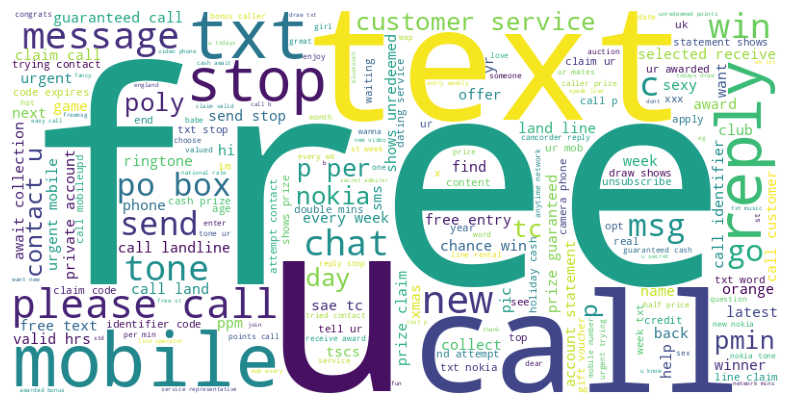

In [ ]:
# Wordcloud for spam messages
from wordcloud import WordCloud


spam_text = " ".join(
    data[data['label'] == 'spam']['cleaned_message']
)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(spam_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


Above is the wordcloud for SPAM MESSAGES..

In [ ]:
data['label'].value_counts()

,count
label,
ham,4825
spam,747


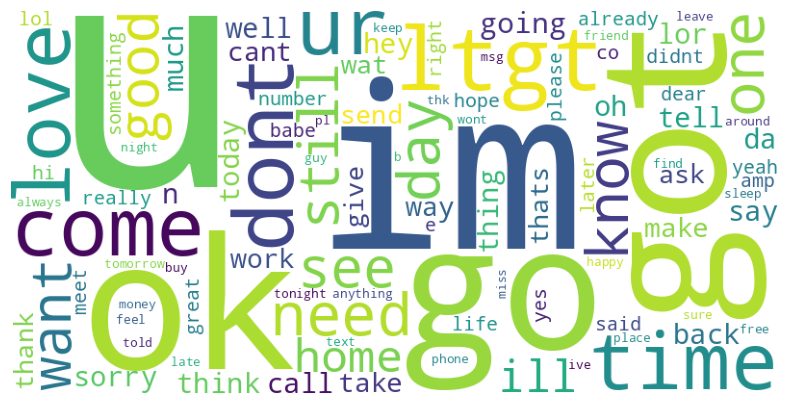

In [ ]:
# WORD CLOUD FOR HAM MESSAGES
ham_text = " ".join(
    data[data['label'] == 'ham']['cleaned_message']
)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100
).generate(ham_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


Above is the wordcloud for HAM MESSAGES..

### Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['label_encoded'] = le.fit_transform(data['label'])


In [ ]:
data['label_encoded']

,label_encoded
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


Machine learning algorithms require numerical input.
Therefore, text labels are converted into numeric form: Ham (Non-Spam) → 0 Spam → 1

In [ ]:
data.head()

,label,message,message_length,cleaned_message,label_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...,0
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts st ...,1
3,ham,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah dont think goes usf lives around though,0


We now pick important and restructured features needed from this data set by keeping them in new dataset df

In [ ]:
df = data[['label_encoded', 'cleaned_message']]
df = df.rename(columns={'label_encoded': 'label', 'cleaned_message': 'message'}) #rename the encoded to cleaned to a simpler name for simplicity sake.

In [ ]:
df.head()

,label,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


## TRAINING AND TESTING

In [ ]:
# Use cleaned messages
vectorizer = TfidfVectorizer(max_features=3000)

# X = numeric features
X = vectorizer.fit_transform(df['message'])


Text encoding was performed using TFIDF vectorization to convert cleaned SMS messages into numerical feature vectors suitable for SVM classification.

Split into train = 80% and test =20%
X represents the SMS messages.
y represents the corresponding labels.
X, y, test_size=0.2(This just makes test = 20%), Then the rest if the data is used in train for both X, and y
The stratify=y parameter ensures that the class distribution remains balanced in both sets.
random_state=42 helps control randomness, without random_state, each RUN may produce Different train/test splits and slightly different results (precision, recall, F1-score)

In [ ]:
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Train SVM

In [ ]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)


LinearSVC()

Predict on test data

In [ ]:
# Make predictions on your test set
y_pred = svm_model.predict(X_test)


Evaluate performance

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9856502242152466
Precision: 0.9925925925925926
Recall: 0.8993288590604027
F1-Score: 0.9436619718309859

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.90      0.94       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



**Accuracy** is the proportion of total predictions that the model got right (both spam and ham).

**Precision** tells us, out of all the messages predicted as spam, how many were actually spam.

**Recall** tells us, out of all actual spam messages, how many did the model correctly identify?

**F1-score** is the harmonic mean of precision and recall. It balances both, especially when the dataset is imbalanced.

Testing with Custom SMS Messages from our spam dataset

In [ ]:
# Sample messages
sample_messages = [
    "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
    "Hey, are we still meeting tomorrow?"
]

# This code Preprocess each message using Our preprocessing python function
cleaned_samples = [preprocess_text(msg) for msg in sample_messages]

# Transform to TF-IDF using your trained vectorizer
sample_tfidf = vectorizer.transform(cleaned_samples)

# Make predictions
predictions = svm_model.predict(sample_tfidf)

# Display results
for msg, pred in zip(sample_messages, predictions):
    print(f"Message: {msg}")
    print("Prediction:", "Spam" if pred == 1 else "Ham")
    print()


Message: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Prediction: Spam

Message: Hey, are we still meeting tomorrow?
Prediction: Ham



In [ ]:
# Using a rondom sample
sample_messages = [
    "CONGRATS! You have been selected to receive ₦50,000 CASH reward from MTN Promo. To claim, send your name and phone number now or call 090XXXXXXX. Offer valid today only"
]

# This code Preprocess each message using Our preprocessing python function
cleaned_samples = [preprocess_text(msg) for msg in sample_messages]

# Transform to TF-IDF using your trained vectorizer
sample_tfidf = vectorizer.transform(cleaned_samples)

# Make predictions
predictions = svm_model.predict(sample_tfidf)

# Display results
for msg, pred in zip(sample_messages, predictions):
    print(f"Message: {msg}")
    print("Prediction:", "Spam" if pred == 1 else "Ham")
    print()

Message: CONGRATS! You have been selected to receive ₦50,000 CASH reward from MTN Promo. To claim, send your name and phone number now or call 090XXXXXXX. Offer valid today only
Prediction: Spam



## **Patterns Associated with Spam Messages**

Spam messages usually follow recognizable linguistic and structural patterns that distinguish them from legitimate (ham) messages. These patterns include:

**Promotional and Reward-Based Language**

Spam messages often contain words such as free, win, prize, bonus, reward, offer, and congratulations. These words are used to attract attention and create excitement.

**Urgency and Pressure Tactics**

Many spam messages attempt to rush the recipient by using phrases like act now, urgent, limited time, call immediately, or offer expires soon. This pressure reduces the chance that the recipient will think critically.

**Call-to-Action Instructions**

Spam messages usually instruct users to perform an action, such as click a link, call a number, reply with a code, or send personal information. These actions often lead to scams or unwanted charges.

**Unusual Formatting and Abbreviations**

Spam messages frequently use excessive capitalization, symbols, numbers, or shortened words (e.g., txt, wkly, u, msg). This is common in SMS spam to reduce cost and bypass simple filters.

**Lack of Personalization**

Unlike ham messages, spam messages are often generic and do not address the recipient by name or reference personal context.

These patterns are captured during text preprocessing and feature extraction (TF-IDF), enabling the Support Vector Machine (SVM) to learn how spam messages differ from ham messages.

Importance of Precision in Spam Detection

Precision measures the proportion of messages classified as spam that are actually spam.

High precision is especially important in spam detection systems for the following reasons:

**Avoiding False Alarms**

A false positive occurs when a legitimate (ham) message is incorrectly classified as spam. This can cause users to miss important messages such as bank alerts, personal communications, or work-related information.

**Maintaining User Trust**

If a system frequently mislabels genuine messages as spam, users may lose confidence in the filtering system and stop using it.

**Practical Usability**

In real-world applications, it is often preferable to allow a few spam messages through rather than wrongly blocking important legitimate messages. High precision ensures that messages flagged as spam are truly spam.

**System Reliability**

A spam detection system with high precision is more reliable and safer for deployment, especially in communication platforms where message loss can have serious consequences.